# PIC reconstruction in two dimensions 

In [1]:
import sys
from tqdm import trange, tqdm
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt

sys.path.append('/Users/46h/Research/')
from accphys.tools import plotting as myplt
from accphys.tools import utils

In [2]:
pplt.rc['cmap.discrete'] = False
pplt.rc['cmap.sequential'] = 'mono_r'

Generate a distribution.

In [3]:
X = np.random.multivariate_normal(mean=[0., 0.], cov=[[1.0, 0.0], [0.0, 1.0]], size=100000)

xmax = 4.0
xpmax = 4.0
limits = [(-xmax, xmax), (-xpmax, xpmax)]
n_bins = 50
edges_x = np.linspace(limits[0][0], limits[0][1], n_bins + 1)
edges_xp = np.linspace(limits[1][0], limits[1][1], n_bins + 1)
centers_x = myplt.get_bin_centers(edges_x)
centers_xp = myplt.get_bin_centers(edges_xp)

Z_true, _, _ = np.histogram2d(X[:, 0], X[:, 1], [edges_x, edges_xp])

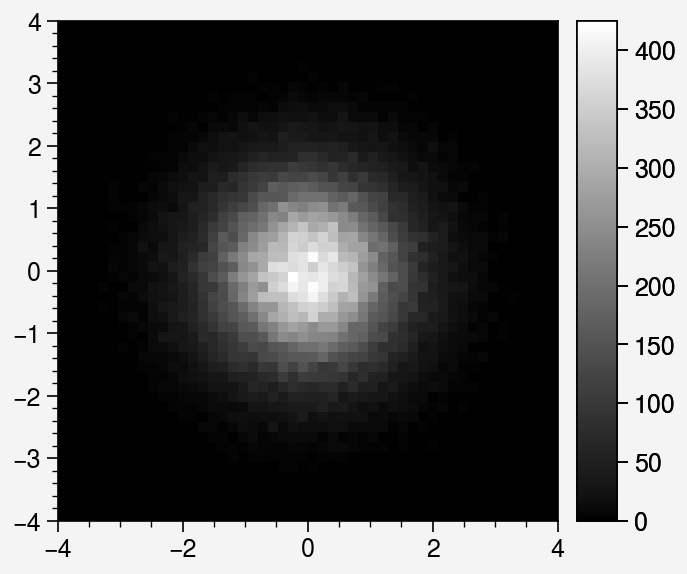

In [4]:
fig, ax = pplt.subplots()
ax.pcolormesh(centers_x, centers_xp, Z_true.T, colorbar=True)
plt.show()

Simulate the measurements.

In [5]:
xedges_screen = yedges_screen = edges_x

In [7]:
n_proj = 6
muxx = np.linspace(0., np.pi, n_proj, endpoint=False)
tmats = [utils.rotation_matrix(mux) for mux in muxx]

projections_meas = []
for proj_index in trange(n_proj):
    M = tmats[proj_index]
    X_screen = utils.apply(M, X)
    projection, _ = np.histogram(X_screen[:, 0], xedges_screen)
    projections_meas.append(projection)
projections_meas = np.array(projections_meas)

100%|██████████| 6/6 [00:02<00:00,  2.85it/s]


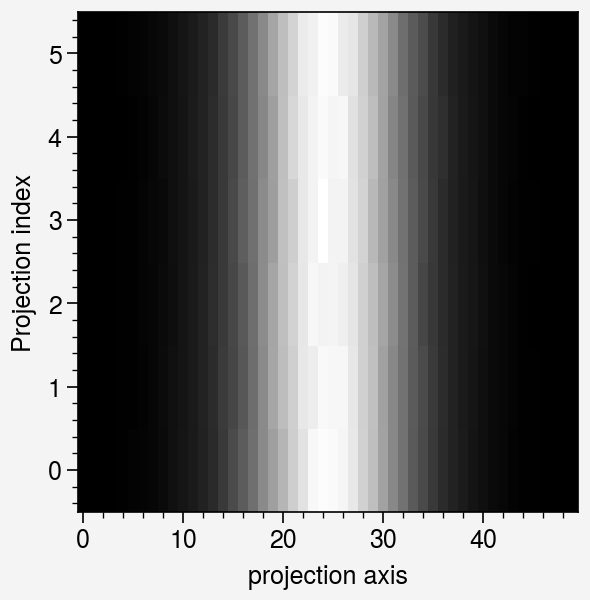

In [8]:
fig, ax = pplt.subplots()
ax.pcolormesh(projections_meas)
ax.format(xlabel='projection axis', ylabel='Projection index')

Implement iterative reconstruction method.

In [9]:
n_parts = int(1e6)

scale = 5.0
lo = [scale * limits[0][0], scale * limits[1][0]]
hi = [scale * limits[0][1], scale * limits[1][1]]
X = np.random.uniform(lo, hi, size=(n_parts, 2))

In [10]:
coords_screen = [utils.apply(M, X) for M in tqdm(tmats)]

100%|██████████| 6/6 [00:20<00:00,  3.40s/it]


In [11]:
projections = [np.histogram(X_screen[:, 0], xedges_screen)[0] for X_screen in tqdm(coords_screen)]

100%|██████████| 6/6 [00:00<00:00, 15.44it/s]


In [13]:
weights = np.zeros((X.shape[0], n_proj))
weights

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [17]:
from scipy import sparse as sp

nrows = 6
ncols = 6

n = 4
data = np.ones(n)
xidx = [0, 1, 2, 3]
yidx = [1, 0, 3, 2]

X = sp.csr_matrix((data, (xidx, yidx)), shape=(nrows, ncols))

print(X)

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 3)	1.0
  (3, 2)	1.0
